In [94]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


load_dotenv()
ow_key = os.getenv('ow_key')

In [95]:
df_ip = pd.read_csv('data/inverter_plants.csv')

# Fix NaN plant_address values to 'Gazipur' for consistency
df_ip['plant_address'] = df_ip['plant_address'].fillna('Gazipur')

df = df_ip[['plant_id', 'plant_name', 'plant_address', 'plant_capacity']]

df

,plant_id,plant_name,plant_address,plant_capacity
0,15848107,DGL (GGI),Gazipur,1280.40
1,1535729,SOLshare LM Tower,Dhaka,4.25
2,1535728,BHC,Dhaka,15.66
3,11811249,ACCL (GGI),Gazipur,285.12
4,11605154,NAL (GGI),Gazipur,227.04
5,12018942,ACML (GGI),Gazipur,525.36
6,11701955,CAL (GGI),Gazipur,522.72
7,11838318,HKL (GGI),Gazipur,269.28
8,1535726,Unilever Sales Depot Bogura,Bogura,39.60
9,9977156,KCL (SOLshare),Narayangang,249.20


In [96]:
# Loading 5 minute inverter data
df_5m = pd.read_csv('data/inverter_five_minutes_generation_logs.csv')

# Adding plant name
df_5m = df_5m.merge(df, on='plant_id', how='left')

plant_daylist = df_5m['plant_name'].unique().tolist()
adress_daylist = df_5m['plant_address'].unique().tolist()

In [97]:
df_5m['plant_name'].value_counts()

CAL (GGI)                      162175
HKL (GGI)                      157090
NAL (GGI)                      131320
ACML (GGI)                     118685
ACCL (GGI)                     101107
KCL (SOLshare)                  55356
DGL (GGI)                       17216
Faruk Auto Garage Rajshahi      10725
Unilever Sales Depot Bogura      3754
Name: plant_name, dtype: int64

In [98]:
df_5m = df_5m[df_5m['plant_name'] == 'HKL (GGI)']
df_5m['generation_amount_kwh'] = df_5m['generation_amount'] / 1000

In [99]:
df_5m['plant_name']

771       HKL (GGI)
772       HKL (GGI)
773       HKL (GGI)
774       HKL (GGI)
775       HKL (GGI)
            ...    
849532    HKL (GGI)
849533    HKL (GGI)
849534    HKL (GGI)
849535    HKL (GGI)
849536    HKL (GGI)
Name: plant_name, Length: 157090, dtype: object

In [100]:
# Remove " , " from the value in generation_amount :
df_5m['generation_amount'] = df_5m['generation_amount'].astype(str).str.replace(',', '')

# Transform "generation_amount" value to float
df_5m['generation_amount'] = df_5m['generation_amount'].astype(float)

df_5m['generation_date'] = pd.to_datetime(df_5m['generation_date'])
df_5m['date'] = df_5m['generation_date'].dt.date

In [101]:
df_5m

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,generation_amount_kwh,date
771,11838318,2025-02-05 18:05:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
772,11838318,2025-02-05 18:10:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
773,11838318,2025-02-05 18:15:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
774,11838318,2025-02-05 18:20:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
775,11838318,2025-02-05 18:25:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
...,...,...,...,...,...,...,...,...
849532,11838318,2024-08-02 20:15:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-08-02
849533,11838318,2024-08-03 12:40:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-08-03
849534,11838318,2024-07-31 18:45:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-07-31
849535,11838318,2024-08-03 23:10:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-08-03


HKL (GGI)
plant_capacity 269.28
max generation 220 - 82 %
2023-12-17 > 2025-10-22 - 675 days
expected data point vs available data point: 194400 - 157090 = 37310 (missing data)
data availability 80.8%
non_zero_generation_amount 85614 44.0%


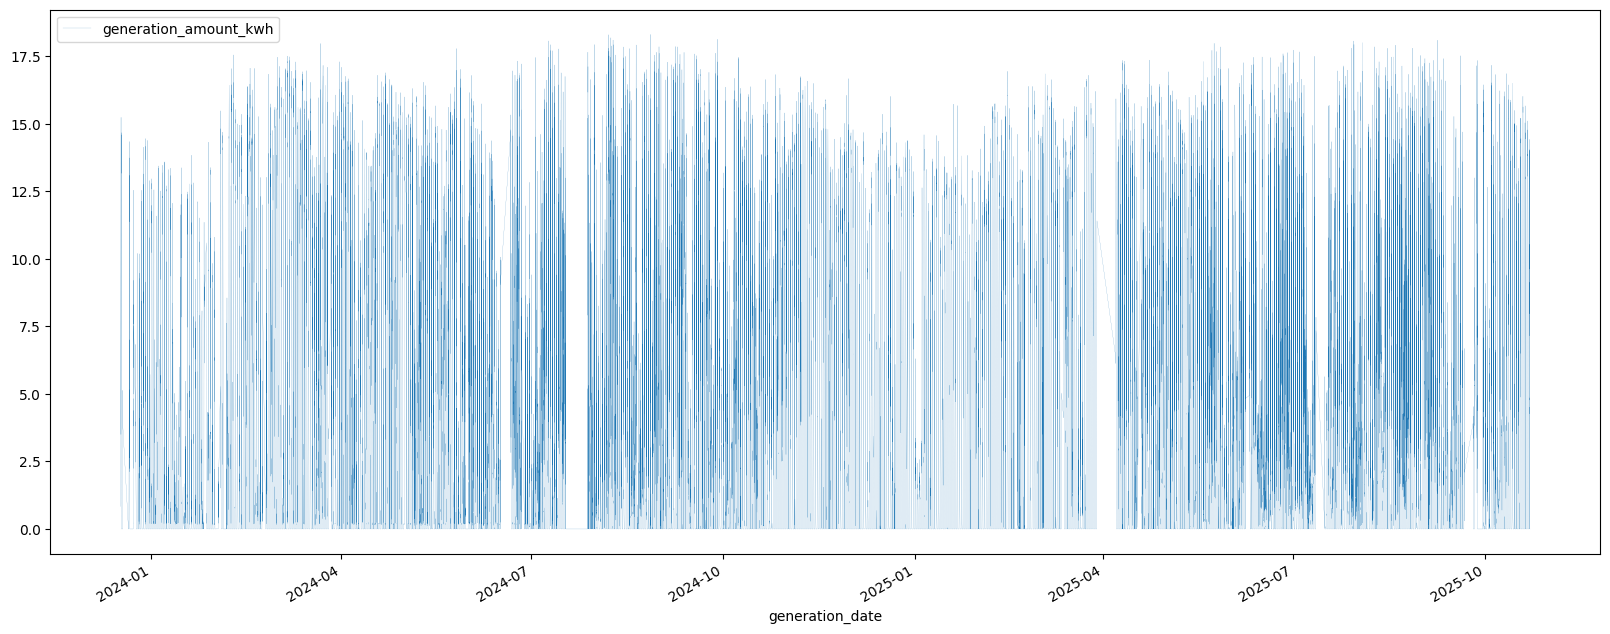

In [102]:
df_5m
plant_list = df_5m['plant_name'].unique()

for i in plant_list:
    figsize = (20, 8)

    df_temp = df_5m[df_5m['plant_name'] == i]

    start = df_temp['date'].min()
    end = df_temp['date'].max()
    days = (end - start).days
    plant_capacity = df_temp['plant_capacity'].min()
    max_generation = round((df_temp['generation_amount'].max() * 12) / 1000)
    print(i)
    print('plant_capacity', plant_capacity)
    print('max generation', max_generation, '-', round(max_generation / plant_capacity * 100),'%')

    print(start, '>', end, '-', days, 'days')
    exp_data =  days * 24 * 12
    avail_data = len(df_temp['generation_amount_kwh'])
    print('expected data point vs available data point:', exp_data, '-', avail_data, '=', exp_data - avail_data, '(missing data)')
    print('data availability', f"{avail_data / exp_data:.1%}" if exp_data else "N/A")

    df_non_zero = df_temp[df_temp['generation_amount_kwh'] != 0]
    print('non_zero_generation_amount', len(df_non_zero), f"{len(df_non_zero) / exp_data :.1%}" if exp_data else "N/A")
    df_temp.plot(x='generation_date', y='generation_amount_kwh', figsize=figsize, linewidth=0.1)
    plt.show()

In [103]:
df_5m

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,generation_amount_kwh,date
771,11838318,2025-02-05 18:05:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
772,11838318,2025-02-05 18:10:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
773,11838318,2025-02-05 18:15:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
774,11838318,2025-02-05 18:20:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
775,11838318,2025-02-05 18:25:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2025-02-05
...,...,...,...,...,...,...,...,...
849532,11838318,2024-08-02 20:15:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-08-02
849533,11838318,2024-08-03 12:40:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-08-03
849534,11838318,2024-07-31 18:45:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-07-31
849535,11838318,2024-08-03 23:10:00+00:00,0.0,HKL (GGI),Gazipur,269.28,0.0,2024-08-03


In [104]:
#24.022350694140282, longitude=90.29576719011767

In [105]:
df_h = df_5m.set_index('generation_date').resample('H')['generation_amount'].sum()

In [106]:
df_h = df_h.reset_index()

In [107]:
df_h

,generation_date,generation_amount
0,2023-12-17 10:00:00+00:00,3214.144411
1,2023-12-17 11:00:00+00:00,143194.428392
2,2023-12-17 12:00:00+00:00,172095.884100
3,2023-12-17 13:00:00+00:00,158937.316383
4,2023-12-17 14:00:00+00:00,101981.455094
...,...,...
16201,2025-10-22 11:00:00+00:00,1872.542267
16202,2025-10-22 12:00:00+00:00,0.000000
16203,2025-10-22 13:00:00+00:00,0.000000
16204,2025-10-22 14:00:00+00:00,0.000000


In [108]:
df_gazi_weather = pd.read_csv('open_data/gazipur_weather.csv')
df_gazi_weather = df_gazi_weather.fillna(0)
# df_gazi_weather = df_gazi_weather[['dt_iso', 'temp', 'visibility', 'temp_min', 'temp_max', 'rain_1h', 'clouds_all']]
df_gazi_weather = df_gazi_weather[['dt_iso', 'temp', 'visibility', 'rain_1h', 'clouds_all']]
df_gazi_weather = df_gazi_weather.rename(columns={'dt_iso': 'generation_date'})

# Clean the 'generation_date' column by removing ' UTC' (assuming this pattern is consistent)
df_gazi_weather['generation_date'] = df_gazi_weather['generation_date'].str.replace(' UTC', '')

# Convert to datetime with UTC timezone
df_gazi_weather['generation_date'] = pd.to_datetime(df_gazi_weather['generation_date'], utc=True)
df_gazi_weather.info()
df_gazi_weather.columns
df_gazi_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34025 entries, 0 to 34024
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   generation_date  34025 non-null  datetime64[ns, UTC]
 1   temp             34025 non-null  float64            
 2   visibility       34025 non-null  float64            
 3   rain_1h          34025 non-null  float64            
 4   clouds_all       34025 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(1)
memory usage: 1.3 MB


,generation_date,temp,visibility,rain_1h,clouds_all
0,2022-01-01 00:00:00+00:00,14.46,0.0,0.0,0
1,2022-01-01 01:00:00+00:00,14.46,0.0,0.0,2
2,2022-01-01 02:00:00+00:00,16.78,2500.0,0.0,7
3,2022-01-01 03:00:00+00:00,16.61,2500.0,0.0,5
4,2022-01-01 04:00:00+00:00,16.87,0.0,0.0,29
...,...,...,...,...,...
34020,2025-10-28 19:00:00+00:00,26.65,4000.0,0.0,20
34021,2025-10-28 20:00:00+00:00,25.50,0.0,0.0,54
34022,2025-10-28 21:00:00+00:00,25.69,3500.0,0.0,54
34023,2025-10-28 22:00:00+00:00,25.56,3500.0,0.0,40


In [109]:
df_HKL = df_gazi_weather.merge(df_h, on='generation_date', how='right')

In [110]:
df_HKL

,generation_date,temp,visibility,rain_1h,clouds_all,generation_amount
0,2023-12-17 10:00:00+00:00,20.71,0.0,0.0,4,3214.144411
1,2023-12-17 11:00:00+00:00,20.77,0.0,0.0,0,143194.428392
2,2023-12-17 12:00:00+00:00,20.78,3500.0,0.0,0,172095.884100
3,2023-12-17 13:00:00+00:00,20.52,3500.0,0.0,0,158937.316383
4,2023-12-17 14:00:00+00:00,17.81,0.0,0.0,0,101981.455094
...,...,...,...,...,...,...
16488,2025-10-22 11:00:00+00:00,28.33,0.0,0.0,0,1872.542267
16489,2025-10-22 12:00:00+00:00,28.33,0.0,0.0,0,0.000000
16490,2025-10-22 13:00:00+00:00,28.53,4000.0,0.0,40,0.000000
16491,2025-10-22 14:00:00+00:00,26.62,0.0,0.0,0,0.000000


In [ ]:
import pvlib
from pvlib.location import Location

location = Location(
    latitude=24.022350694140282,
    longitude=90.29576719011767,
    tz='Asia/Dhaka')

times = df_HKL['generation_date']

solpos = location.get_solarposition(times)


df_HKL = df_HKL.merge(solpos, on='generation_date', how='right')


# Remove Night Time
df_HKL['is_daytime'] = df_HKL['apparent_elevation'] > 0
df_HKL = df_HKL['is_daytime'] == True

,generation_date,temp,visibility,rain_1h,clouds_all,generation_amount,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,is_daytime
0,2023-12-17 10:00:00+00:00,20.71,0.0,0.0,4,3214.144411,75.982912,76.048230,14.017088,13.951770,236.090056,4.083026,True
1,2023-12-17 11:00:00+00:00,20.77,0.0,0.0,0,143194.428392,87.604678,87.877044,2.395322,2.122956,243.204065,4.062652,True
2,2023-12-17 12:00:00+00:00,20.78,3500.0,0.0,0,172095.884100,100.400236,100.400236,-10.400236,-10.400236,248.932706,4.042272,False
3,2023-12-17 13:00:00+00:00,20.52,3500.0,0.0,0,158937.316383,113.377051,113.377051,-23.377051,-23.377051,253.728087,4.021888,False
4,2023-12-17 14:00:00+00:00,17.81,0.0,0.0,0,101981.455094,126.655405,126.655405,-36.655405,-36.655405,257.913423,4.001499,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17062,2025-10-22 11:00:00+00:00,28.33,0.0,0.0,0,1872.542267,84.746168,84.904009,5.253832,5.095991,255.301169,15.558410,True
17063,2025-10-22 12:00:00+00:00,28.33,0.0,0.0,0,0.000000,98.324894,98.324894,-8.324894,-8.324894,261.345596,15.564464,False
17064,2025-10-22 13:00:00+00:00,28.53,4000.0,0.0,40,0.000000,111.957037,111.957037,-21.957037,-21.957037,267.092708,15.570499,False
17065,2025-10-22 14:00:00+00:00,26.62,0.0,0.0,0,0.000000,125.657739,125.657739,-35.657739,-35.657739,273.234942,15.576514,False


In [112]:
import pvlib
from pvlib.location import Location

# Coordinates of the plant (to be retrieved or inferred via plant_address)
location = Location(latitude=24.022350694140282, longitude=90.29576719011767, tz='Asia/Dhaka', altitude=50)

# Use generation_date directly, as it is already tz-aware (do not call tz_localize)
times = df_5m['generation_date']

# Ensure times is sorted and has no NaT
times = times.dropna().sort_values()

# Reindex clearsky and solpos to match df_5m's index
solpos = location.get_solarposition(times)
# Ensure times is a DatetimeIndex with a regular frequency for clearsky calculation
if isinstance(times, pd.Series):
    times_index = pd.DatetimeIndex(times)
else:
    times_index = times

# Attempt to infer freq; if not possible, default to 5min
if times_index.freq is None:
    inferred_freq = pd.infer_freq(times_index)
    if inferred_freq is not None:
        freq = inferred_freq
    else:
        freq = '5min'
    # Construct a new index with consistent frequency covering the same range
    full_range = pd.date_range(start=times_index.min(), end=times_index.max(), freq=freq, tz=times_index.tz)
    clearsky = location.get_clearsky(full_range)
    clearsky = clearsky.reindex(times_index, method='nearest')e
else:
    clearsky = location.get_clearsky(times_index)

# We must align the result exactly to the index of df_5m for correct assignment (in case of missing rows/Nat)
df_5m = df_5m.copy()
df_5m['ghi_clear'] = clearsky['ghi'].reindex(df_5m.index, fill_value=0).to_numpy()

# Only fill expected_power for HKL (GGI). Others should be NaN.
plant_capacity = df_5m.loc[df_5m['plant_name'] == 'HKL (GGI)', 'plant_capacity'].iloc[0]
PR_typique = 0.82  # Typical performance ratio

df_5m['expected_power'] = float('nan')
mask_hkl = df_5m['plant_name'] == 'HKL (GGI)'
df_5m.loc[mask_hkl, 'expected_power'] = (
    df_5m.loc[mask_hkl, 'ghi_clear'] * plant_capacity * PR_typique
)

SyntaxError: invalid syntax (1964842635.py, line 31)